In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('scores_y.csv')
data

,Response Detect,Prob,Hall,Yes_P,binary,Correct,Man_cor,COT_man,Unnamed: 8,ChainPoll_score,CahiPoll_Text,Ent,SR
0,Yes,1.000000,0,1.000000,1,1,1,1.0,1.0,1.0,1.0,1.0,1.0
1,Yes,1.000000,0,1.000000,1,1,1,1.0,2.0,0.0,1.0,0.0,0.0
2,Yes,0.749087,1,0.749087,1,0,0,0.0,3.0,0.0,1.0,0.0,0.0
3,Yes,0.453262,0,0.453262,1,1,1,1.0,4.0,1.0,1.0,0.0,1.0
4,No,0.492188,1,0.507812,0,0,1,0.0,5.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Yes,1.000000,1,1.000000,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
196,No,0.250913,1,0.749087,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
197,No,0.777300,1,0.222700,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
198,Yes,1.000000,1,1.000000,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data['COT']=data['COT_man'].cumsum()
data['acc_COT']=data['COT']/(data.index + 1)

In [19]:
data['SR_sum']=data['SR'].cumsum()
data['acc_SR']=data['SR_sum']/(data.index + 1)

In [32]:
data['Ent_s']=data['Ent'].cumsum()
data['acc_Ent']=data['Ent_s']/(data.index + 1)

In [20]:
data['CP']=data['ChainPoll_score'].cumsum()
data['acc_CP']=data['CP']/(data.index + 1)

In [21]:
data['CPt']=data['CahiPoll_Text'].cumsum()
data['acc_CPt']=data['CPt']/(data.index + 1)

In [22]:
data['c']= data['Correct'].cumsum()
data['acc_c']= data['c']/(data.index + 1)
data['acc_c']

0      1.000000
1      1.000000
2      0.666667
3      0.750000
4      0.600000
         ...   
195    0.260204
196    0.258883
197    0.257576
198    0.256281
199    0.255000
Name: acc_c, Length: 200, dtype: float64

In [23]:
data['cr']= data['Man_cor'].cumsum()
data['acc_cr']= data['cr']/(data.index + 1)
data['acc_cr']

0      1.000000
1      1.000000
2      0.666667
3      0.750000
4      0.800000
         ...   
195    0.510204
196    0.512690
197    0.515152
198    0.512563
199    0.515000
Name: acc_cr, Length: 200, dtype: float64

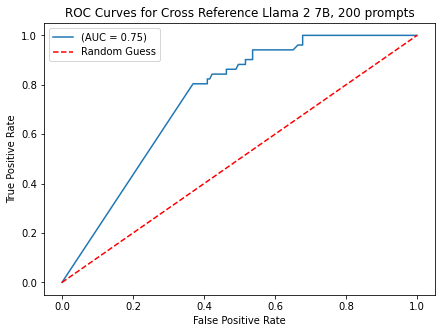

In [24]:
y_true = data['Correct']
y_pred = data['Yes_P']
plt.figure(figsize=(7, 5))

fpr, tpr,_ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'(AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Cross Reference Llama 2 7B, 200 prompts')
plt.legend()
plt.show()

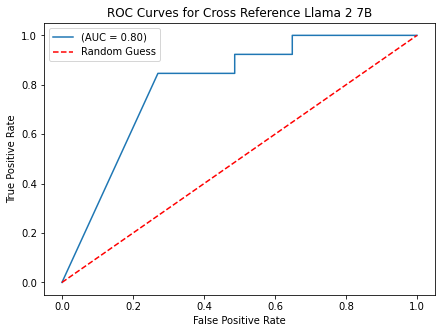

In [51]:
y_true = data['Correct']
y_pred = data['Yes_P']
plt.figure(figsize=(7, 5))

fpr, tpr,_ = roc_curve(y_true[:50], y_pred[:50])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'(AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Cross Reference Llama 2 7B')
plt.legend()
plt.show()

In [26]:
acc = sum(data['Correct'])/len(data['Man_cor'])
acc

0.255

In [27]:
acc = sum(data['Correct'][:50])/len(data['Man_cor'][:50])
acc

0.26

In [28]:
acc_cr_50 = sum(data['Man_cor'][:50])/len(data['Man_cor'][:50])
acc_cr_50

0.56

In [36]:
acc_Ent_50 = sum(data['Ent'][:50])/len(data['Man_cor'][:50])
acc_Ent_50

0.36

In [29]:
acc_cr = sum(data['Man_cor'])/len(data['Man_cor'])
acc_cr

0.515

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x720 with 0 Axes>

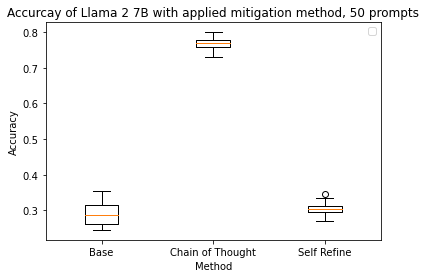

In [50]:

plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
methods = ['Base', 'Chain of Thought','Self Refine']
pdata = [data['acc_c'][25:50],data['acc_COT'][25:50],data['acc_SR'][25:50]]
ax.boxplot(pdata)
ax.set_xticklabels(methods)

# Set labels and title
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Accurcay of Llama 2 7B with applied mitigation method, 50 prompts')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 720x720 with 0 Axes>

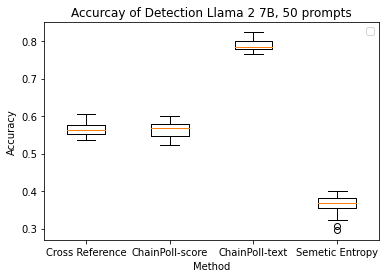

In [48]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots()
methods = ['Cross Reference', 'ChainPoll-score','ChainPoll-text','Semetic Entropy']
pdata = [data['acc_cr'][25:50],data['acc_CP'][25:50],data['acc_CPt'][25:50],data['acc_Ent'][25:50]]
ax.boxplot(pdata)
ax.set_xticklabels(methods)

# Set labels and title
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Accurcay of Detection Llama 2 7B, 50 prompts')
plt.legend()
plt.show()

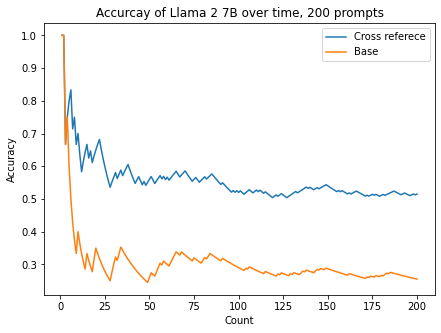

In [31]:
plt.figure(figsize=(7, 5))


plt.plot(data.index+1, data['acc_cr'], label=f'Cross referece')
plt.plot(data.index+1, data['acc_c'], label=f'Base')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Accuracy')
plt.title('Accurcay of Llama 2 7B over time, 200 prompts')
plt.legend()
plt.show()